In [ ]:
from zipfile import ZipFile
file_name = "rockpaperscissors.zip"
 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [ ]:
data = "rockpaperscissors/rps-cv-images"
print(os.listdir(data))

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']


In [ ]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.04):
            print()
            print("Reached almost 99% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = callBack()

In [ ]:
# model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 33, 64)       

In [ ]:
# train/validation split using ImageDataGenerator
_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


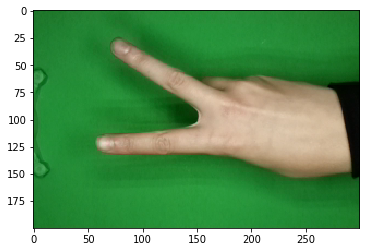

[0. 0. 1.]


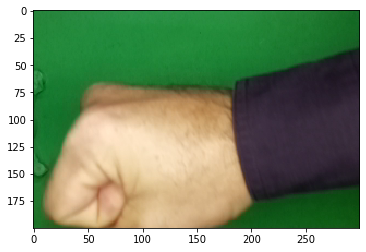

[0. 1. 0.]


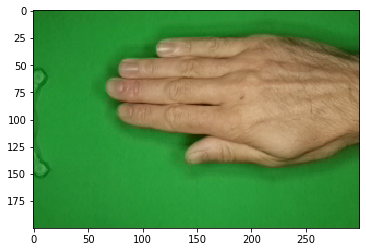

[1. 0. 0.]


In [ ]:
# the first 3 images with the corresponding labels
x, y = train_generator.next()
plt.imshow(x[0], interpolation='nearest')
plt.show()
print(y[0])

plt.imshow(x[1], interpolation='nearest')
plt.show()
print(y[1])

plt.imshow(x[2], interpolation='nearest')
plt.show()
print(y[2])

In [ ]:
# model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks]
)

print(history.epoch, history.history)

Epoch 1/15
13/12 [==============================] - ETA: -1s - loss: 0.0049 - accuracy: 0.9982
Reached almost 99% accuracy so cancelling training!
13/12 [==============================] - 87s 7s/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0879 - val_accuracy: 0.9688
[0] {'loss': [0.004883576184511185], 'accuracy': [0.9981516003608704], 'val_loss': [0.08787048608064651], 'val_accuracy': [0.96875]}


In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('paper')
  else:
    print('rock')